# AoL - Scientific Computing

##### 2702227731 - Evan Santosa

## Problem #1: Find Trend of Data

Regression is used to find trend of data. It will predict numerical values based on training data that includes both features and known labels. The objective is to determine the most suitable function that characterizes the connection between variables.

There are many different types of regression algorithm, one of which is polynomial regression. It is a form of regression analysis in which the relationship between the features x and labels y is modeled as an nth degree polynomial in x.

Polynomial regression provides good accuracy because of it's complexity. Hence, to solve this problem, polynomial regression that will be used.

In [1]:
# Import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sympy import symbols, diff, lambdify

In [2]:
# DataFrame from the dataset in data.xlsx
df = pd.read_excel("data.xlsx", sheet_name="in")

In [3]:
# Because the data in the excel file is provided horizontally,
# we need to transpose df 
df = df.T

In [4]:
# Extract x and y variable from df
# The x variable is month index
# The y variable is bag's production
y = np.array(df.values).flatten()
x = np.array([i for i in range(1, y.size + 1)])

In [5]:
# Create polynomial regression model 
# It used 3rd degree polynomial
regression_model = np.poly1d(np.polyfit(x, y, 3))

In [6]:
# Extract the refression coefficient
coeff = regression_model.coeffs

In [7]:
# Display the model
print(f"y = {round(coeff[0], 3)}x^3 + {round(coeff[1], 3)}x^2 + {round(coeff[2], 3)}x + {round(coeff[3], 3)}")

y = 0.004x^3 + -0.134x^2 + 47.224x + 1748.507


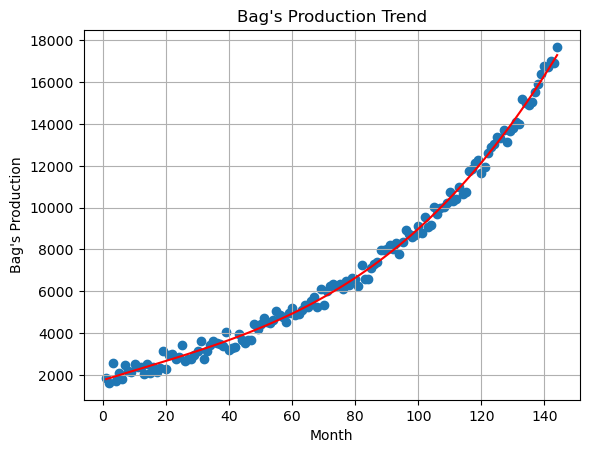

In [8]:
# Display the bag's production trend in graph
curve = np.linspace(1, y.size, 100)

plt.scatter(x, y)
plt.plot(curve, regression_model(curve), color="red")
plt.grid()

plt.xlabel("Month")
plt.ylabel("Bag's Production")
plt.title("Bag's Production Trend")

plt.show()

In [9]:
# Find Mean Absolute Error (MAE)
#
# When the model is use for prediction, the predicted value can be overvalue, undervalue, 
# and equal to the real value
# In MAE, it doesn't matter if the prediction is overvalue or undervalue
# For example, -3 and +3 indicates a variance of 3
# MAE will find the average of variance
round(mean_absolute_error(y, regression_model(x)), 3)

245.304

In [10]:
# Find Mean Squared Error (MSE)
#
# MSE is a metric that "amplifies" larger errors by squaring the individual errors
# and calculating the mean of the squared values
round(mean_squared_error(y, regression_model(x)), 3)

83195.127

In [11]:
# Find R-Squared
#
# Coefficient of determination (R-Squared) measures the proportion of variance
# The R-Squared value is between 0 and 1
# The close to 1, the better the model's accuracy is
round(r2_score(y, regression_model(x)), 3)

0.996

## Problem #2: Convert Model To Numerical Form

The model for the trend's of data has been found. Now, it's time to convert it into numerical form and find the accuracy of the model.
We can use Taylor Series to convert the model into the numerical form.

In [12]:
# Get the model from problem #1
X = symbols("x")
f = round(coeff[0], 3)*X**3 + round(coeff[1], 3)*X**2 + round(coeff[2], 3)*X + round(coeff[3], 3)
f

0.004*x**3 - 0.134*x**2 + 47.224*x + 1748.507

In [13]:
# Calculate the first derivative
first_derivative = diff(f, X)
first_derivative

0.012*x**2 - 0.268*x + 47.224

In [14]:
# Calculate the second derivative
second_derivative = diff(first_derivative, X)
second_derivative

0.024*x - 0.268

In [15]:
# Calculate the third derivative
third_derivative = diff(second_derivative, X)
third_derivative

0.0240000000000000

In [16]:
# Calculate the fourth derivative
fourth_derivative = diff(third_derivative, X)
fourth_derivative

0

In [17]:
# Convert f, first_derivative, second_derivative, third_derivative, and fourth_derivate into an actual function
f = lambdify(X, f)
first_derivative = lambdify(X, first_derivative)
second_derivative = lambdify(X, second_derivative)
third_derivative = lambdify(X, third_derivative)
fourth_derivative = lambdify(X, fourth_derivative)

In [18]:
# Construct Taylor Series function
def taylor_series(X, a):
    approximation = (f(a)*(X - a)**0 / math.factorial(0)) + (first_derivative(a)*(X - a)**1 / math.factorial(1)) + (second_derivative(a)*(X - a)**2 / math.factorial(2)) + (third_derivative(a)*(X - a)**3 / math.factorial(3)) + (fourth_derivative(a)*(X - a)**4 / math.factorial(4))
    return approximation

In [19]:
# Approximate the value of x by using Taylor Series
# Let's say we want to approximate the bag's production data in the first month
taylor_approximation = round(taylor_series(1, 0), 3)
taylor_approximation

1795.601

In [20]:
# Compare the result with the regression model
regression_approximation = round(regression_model(0), 3)
regression_approximation

1748.507

In [21]:
# Find the absolute error of Taylor Series approximation
round(abs((taylor_approximation - regression_approximation)/regression_approximation), 3)

0.027

## Problem #3: Provide Time When EIGER Need to Start Building Their New Warehouse

The warehouse was designed to be able to store a maximum of 25,000 bags at each month. From the trend acquired, EIGER need to start building their new warehouse. But, it need at least 13 months. Hence, we will find the start time for them.

This problem can be solve using root of equation. To find root of equation, there are several algorithm, two of the most popular are bisection method and Newton-Raphson's method. For this problem, bisection method will be used because it provides a convergence guaranteed even though it slower than Newton-Raphson.

In [22]:
# Define the equation function
#
# Let's take regression model equation from problem #1
# Since the warehouse was designed to be able to store a maximum of 25,000 bags,
# hence the equation will become
# f(x) = regression_model(x) - 25000
def f(x):
    return regression_model(x) - 25000

In [23]:
# Construct Newton-Raphson method
# This function will run recursively until the error is less than 1%
def bisection(a, b):
    f_a = f(a)
    f_b = f(b)

    if np.sign(f_a) == np.sign(f_b):
        print(f"There is no root between {a} and {b}")
        return

    c = (a + b) / 2
    f_c = f(c)

    if np.abs(f_c) < 0.01:
        return round(c, 3)

    if np.sign(f_c) == np.sign(f_a):
        return bisection(c, b)
    else:
        return bisection(a, c)

In [24]:
# Find the root of equations
# Assume the initial guess between 144 and 200
month = bisection(144, 200)
month

170.374

In [25]:
# Hence,  EIGER should building their new warehouse at month:
month = month - 13
month

157.374